<a href="https://colab.research.google.com/github/sachingk08/githubrepo/blob/mybranch/haberman_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from google.colab import files
files = files.upload()

Saving haberman.csv to haberman (2).csv


In [6]:
haberman = pd.read_csv("haberman.csv")

Given dataset is a binary classification problem and task is to find wheather the corresponding featured person has survived after 5 years or not

In [7]:
print(haberman.shape)

(306, 4)


In [9]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


**Details of attributes**
age :- Age of patient at time of operation (numerical) year :- Patient's year of operation (year - 1900, numerical) nodes :- Number of positive axillary nodes detected (numerical) status :- 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [10]:
haberman["status"].value_counts()
# balanced-dataset vs imbalanced datasets
#haberman is a imbalanced dataset as the number of data points are different.

1    225
2     81
Name: status, dtype: int64

**Good news From this we can say that survival of people is more than the number of deaths who has dagnosed with the cancer.

In [11]:
haberman.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


To find wheather we have missing values?

In [12]:
haberman.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

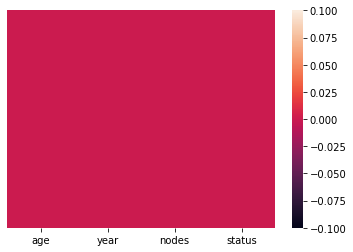

In [13]:
sns.heatmap(haberman.isnull(),yticklabels=False)
plt.show()

In [14]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


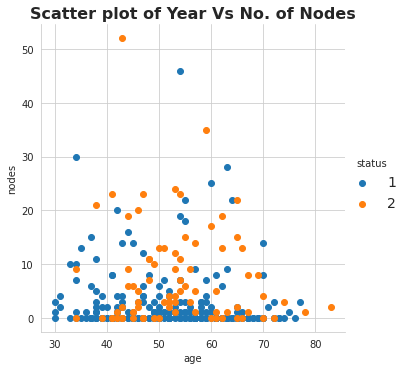

In [26]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status",height = 5) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend(fontsize = 14)
plt.title("Scatter plot of Year Vs No. of Nodes", fontsize = 16,fontweight = 'bold')
plt.show();

In [ ]:
haberman.info()

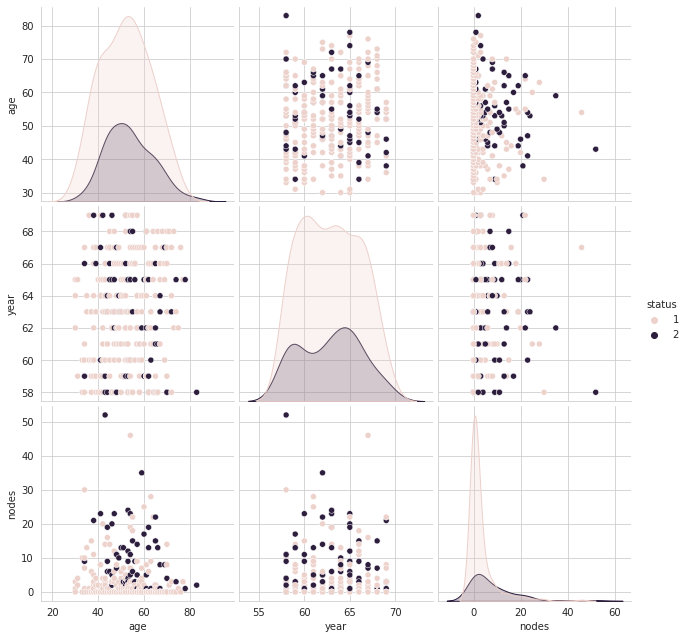

In [16]:
sns.set_style("whitegrid");
sns.color_palette("hls", 2)
sns.pairplot(haberman, hue="status", height=3);
plt.show()

In [17]:
discrete=[]
for feature in haberman.columns:
    unique,counts= np.unique(haberman[feature],return_counts=True)
    total=dict(zip(unique,counts))
    for key,values in total.items():
        if values> 10:
            discrete.append([feature,[key,values]])
            
            
discrete

[['age', [43, 11]],
 ['age', [47, 11]],
 ['age', [50, 12]],
 ['age', [52, 14]],
 ['age', [53, 11]],
 ['age', [54, 13]],
 ['age', [57, 11]],
 ['year', [58, 36]],
 ['year', [59, 27]],
 ['year', [60, 28]],
 ['year', [61, 26]],
 ['year', [62, 23]],
 ['year', [63, 30]],
 ['year', [64, 31]],
 ['year', [65, 28]],
 ['year', [66, 28]],
 ['year', [67, 25]],
 ['year', [68, 13]],
 ['year', [69, 11]],
 ['nodes', [0, 136]],
 ['nodes', [1, 41]],
 ['nodes', [2, 20]],
 ['nodes', [3, 20]],
 ['nodes', [4, 13]],
 ['status', [1, 225]],
 ['status', [2, 81]]]

In [18]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [19]:
#people with 4 or less nodes
people_with_4 = haberman.loc[haberman["nodes"] <= 4]
people_with_4["status"].value_counts()


1    188
2     42
Name: status, dtype: int64

From the description of the data, we can get the insight as age of person getting infected is between 30 to 83. 75% of people have only 4 or less positive axillary nodes detected and 80% of them have survived the 5 years and more after operation. 25 % of detection of cancer has seen in people after the age of 60.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


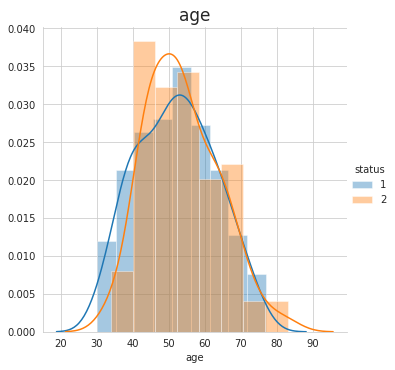

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


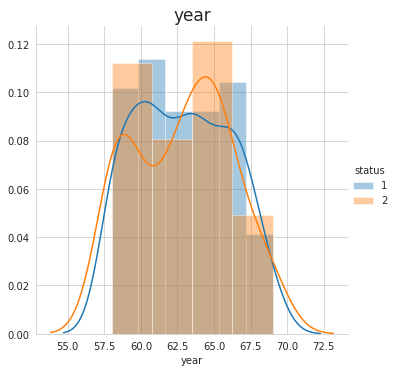

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


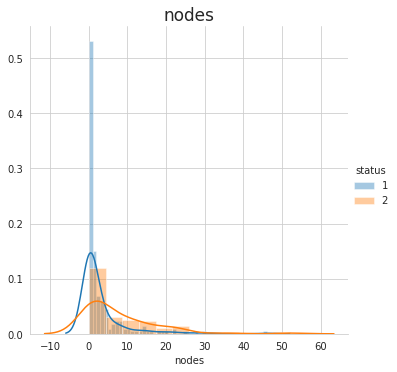

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate

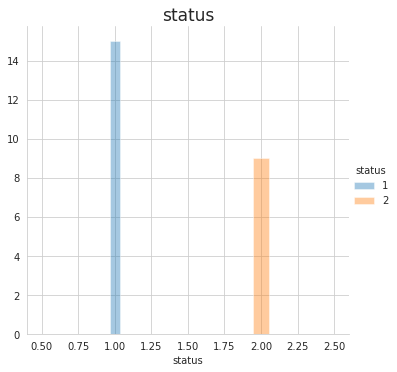

In [20]:
for features in haberman.columns:
    sns.set_style("whitegrid");
    sns.FacetGrid(haberman,hue="status",height=5)\
    .map(sns.distplot,features)\
    .add_legend();

    plt.title(features, fontsize=17)
    plt.show();

From this we can see that the only chance to analyse and predict could be by number of nodes which are observed in patient with age of patient.

In [21]:
haberman_survived = haberman.loc[haberman["status"] == 1];
haberman_unsurvived = haberman.loc[haberman["status"] == 2];

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


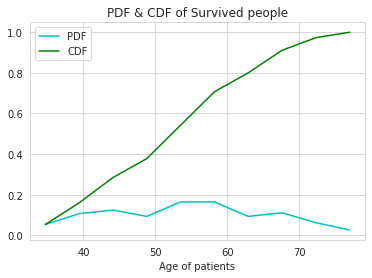

In [22]:
counts, bin_edges = np.histogram(haberman_survived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color = 'c',label = "PDF")
plt.plot(bin_edges[1:], cdf,color = 'g',label = "CDF")
plt.xlabel("Age of patients")
plt.title("PDF & CDF of Survived people")
plt.legend()

plt.show();

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


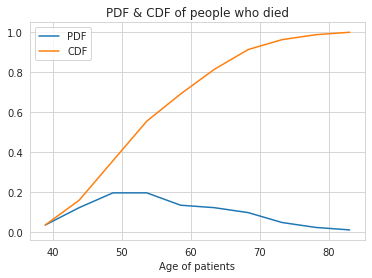

In [23]:
counts, bin_edges = np.histogram(haberman_unsurvived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'PDF')
plt.plot(bin_edges[1:], cdf,label = 'CDF')
plt.xlabel("Age of patients")
plt.title("PDF & CDF of people who died")
plt.legend()

plt.show();

PDF of Dead people : [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
Determined bin sizes: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
PDF of Living people : [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
Determined bin sizes: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


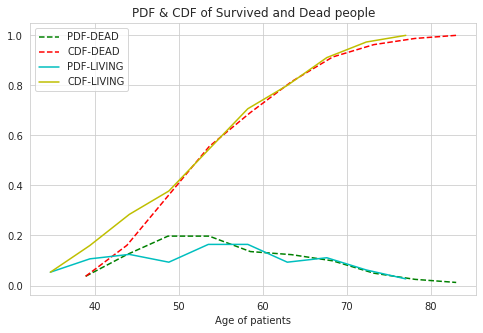

In [24]:
##
fig = plt.figure(figsize=(8,5))

counts, bin_edges = np.histogram(haberman_unsurvived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("PDF of Dead people :",pdf)
print("Determined bin sizes:",bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color='g',linestyle='--',label = 'PDF-DEAD')
plt.plot(bin_edges[1:], cdf,color='r',linestyle='--',label = 'CDF-DEAD')
plt.xlabel("Age of patients")
plt.legend()

##

counts, bin_edges = np.histogram(haberman_survived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("PDF of Living people :",pdf)
print("Determined bin sizes:",bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color='c',label = "PDF-LIVING")
plt.plot(bin_edges[1:], cdf,color='y',label = "CDF-LIVING")
plt.xlabel("Age of patients")
plt.title("PDF & CDF of Survived and Dead people")
plt.legend()


plt.show()

Mean, Variance and Std-dev

In [25]:
print("Means")
print(np.mean(haberman_survived["nodes"]))
print(np.mean(haberman_unsurvived["nodes"]))

print("\nStd Deviation")
print(np.std(haberman_survived["nodes"]))
print(np.std(haberman_unsurvived["nodes"]))

Means
2.7911111111111113
7.45679012345679

Std Deviation
5.857258449412131
9.128776076761632


Here we can know the average mean values of of nodes in survived people and dead people generally people with more nodes have died.

Percentile, Quantile, IQR

In [28]:
print("\nPercentile:")
print(np.percentile(haberman_survived["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_unsurvived["nodes"],np.arange(0, 100, 25)))


Percentile:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


From quantiles we can see the percentage of values that have nodes which are dangerous. #More people who survived got admitted or got treatment even before the is one active node. People who died are failed to recgnise the symptoms if any and treatment

**Box plot and Whiskers**


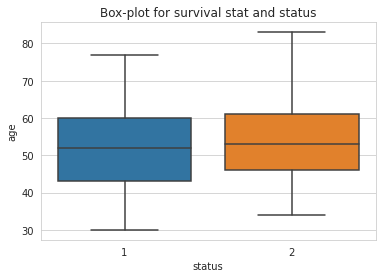

In [30]:
sns.boxplot(x="status",y="age",data=haberman)
plt.title("Box-plot for survival stat and "+features)
plt.show()

Inter-Quartile ranges of states that most people between age 42 to 62 have been diagnosed and some are to death also

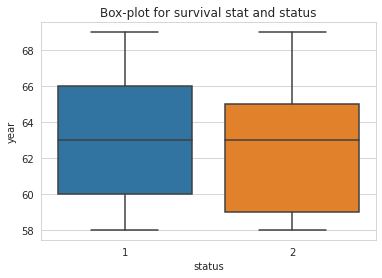

In [31]:
sns.boxplot(x="status",y="year",data=haberman)
plt.title("Box-plot for survival stat and "+features)
plt.show()

Well from this we can say that initial operation for cancers were not so of good result. But later as increase in experience the gave good results.

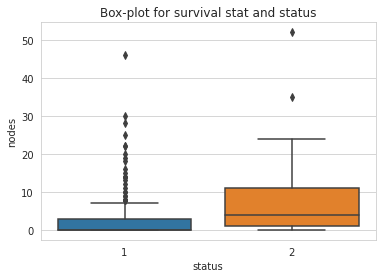

In [32]:
sns.boxplot(x="status",y="nodes",data=haberman)
plt.title("Box-plot for survival stat and "+features)
plt.show()

Most of the people had lower node values(Positive nodes of cancer cells) have survived,unfortunatelly people with in between 2 and 12 nodes are deceased.



Violin plots

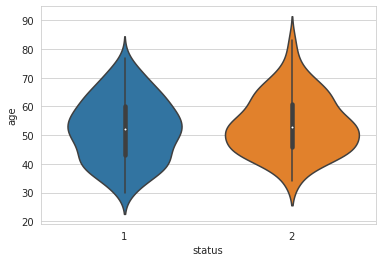

In [33]:
sns.violinplot(x="status",y="age",data=haberman)
plt.show()

We can use Violin plot as the combination of box plot and distribution plot

**OBSERVATIONS**

TASK - Given dataset is a binary classification problem and task is to find wheather the corresponding featured person has survived after 5 years or not
1) Survival of people is more than the number of deaths who has dagnosed with the cancer.
2) We can get the insight as age of person getting infected is between 30 to 83.
3) 75% of people have only 4 or less positive axillary nodes detected and 80% of them have survived the 5 years and more after operation.
4)  25 % of detection of cancer has seen in people after the age of 60.
5) From this we can see that the only chance to analyse and predict could be by number of nodes which are observed in patient with age of patient.

6) From the available data we are able to analyse this, More data could have helped.
